# Natural Language Processing Project

In this NLP project you will be attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews.

We will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## The Data

**Read the yelp.csv file and set it as a dataframe called yelp.**

In [2]:
yelp = pd.read_csv('yelp.csv')

In [3]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [4]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [5]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [11]:
yelp.groupby('stars')['cool'].describe()

,count,mean,std,min,25%,50%,75%,max
stars,,,,,,,,
1,749.0,0.576769,1.474759,0.0,0.0,0.0,1.0,17.0
2,927.0,0.719525,1.491182,0.0,0.0,0.0,1.0,14.0
3,1461.0,0.788501,1.602576,0.0,0.0,0.0,1.0,18.0
4,3526.0,0.954623,2.034367,0.0,0.0,0.0,1.0,38.0
5,3337.0,0.944261,2.484583,0.0,0.0,0.0,1.0,77.0


In [12]:
yelp.groupby('stars')['useful'].describe()

,count,mean,std,min,25%,50%,75%,max
stars,,,,,,,,
1,749.0,1.604806,2.302354,0.0,0.0,1.0,2.0,20.0
2,927.0,1.563107,1.969546,0.0,0.0,1.0,2.0,17.0
3,1461.0,1.306639,1.985327,0.0,0.0,1.0,2.0,19.0
4,3526.0,1.395916,2.236087,0.0,0.0,1.0,2.0,38.0
5,3337.0,1.381780,2.659065,0.0,0.0,1.0,2.0,76.0


In [13]:
yelp.groupby('stars')['funny'].describe()

,count,mean,std,min,25%,50%,75%,max
stars,,,,,,,,
1,749.0,1.056075,2.480309,0.0,0.0,0.0,1.0,30.0
2,927.0,0.875944,1.837553,0.0,0.0,0.0,1.0,20.0
3,1461.0,0.694730,1.643553,0.0,0.0,0.0,1.0,24.0
4,3526.0,0.670448,1.962417,0.0,0.0,0.0,1.0,57.0
5,3337.0,0.608631,1.815606,0.0,0.0,0.0,1.0,39.0


**New column called "text length" which is the number of words in the text column.**

In [14]:
yelp['text length'] = yelp['text'].apply(len)

In [22]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


**FacetGrid from the seaborn library to create a grid of 5 histograms of text length based off of the star ratings**

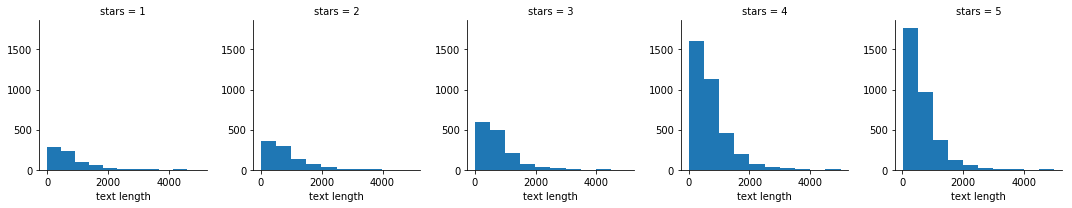

In [32]:
g = sns.FacetGrid(yelp, col='stars')
g = g.map(plt.hist, 'text length')

**Boxplot of text length for each star category.**

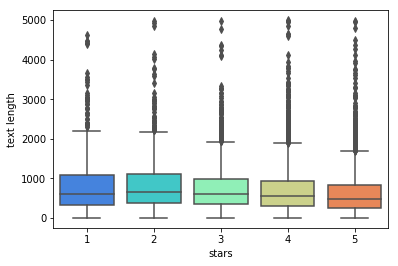

In [34]:
sns.boxplot(data=yelp, x='stars', y='text length', palette='rainbow')

**Countplot of the number of occurrences for each type of star rating.**

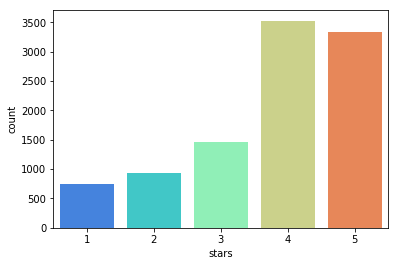

In [36]:
sns.countplot(x='stars', data=yelp, palette='rainbow')

** Groupby to get the mean values of the numerical columns:**

In [39]:
stars = yelp.groupby('stars').mean()
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


**corr() method on that groupby dataframe to produce this dataframe:**

In [40]:
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


**Heatmap .corr() dataframe:**

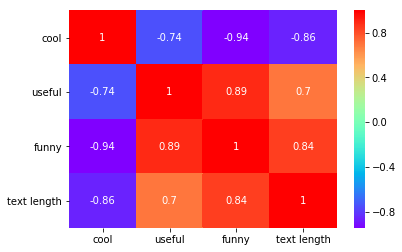

In [47]:
sns.heatmap(stars.corr(), cmap='rainbow', annot=True)

## NLP Classification Task

**Dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.**

In [59]:
yelp_class = yelp[(yelp['stars']==1) | (yelp['stars'] == 5)]

** Create two objects X and y. X will be the 'text' column of yelp_class and y will be the 'stars' column of yelp_class. (Your features and target/labels)**

In [60]:
X = yelp_class['text']
y= yelp_class['stars']

**Import CountVectorizer and create a CountVectorizer object.**

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

** Fit_transform method on the CountVectorizer object and pass in X (the 'text' column).**

In [73]:
X.shape

(4086, 19183)

In [64]:
X = cv.fit_transform(X)

## Train Test Split

** Use train_test_split to split up the data into X_train, X_test, y_train, y_test**

In [74]:
from sklearn.cross_validation import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training a Model

In [76]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

**fit nb using the training data.**

In [78]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Predictions and Evaluations

In [79]:
predictions = nb.predict(X_test)

** confusion matrix and classification report **

In [80]:
from sklearn.metrics import confusion_matrix, classification_report

In [82]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[159  69]
 [ 22 976]]


             precision    recall  f1-score   support

          1       0.88      0.70      0.78       228
          5       0.93      0.98      0.96       998

avg / total       0.92      0.93      0.92      1226



# Using Text Processing

** Import TfidfTransformer from sklearn. **

In [83]:
from sklearn.feature_extraction.text import TfidfTransformer

** Import Pipeline from sklearn. **

In [84]:
from sklearn.pipeline import Pipeline

In [94]:
from sklearn.naive_bayes import GaussianNB

** Creating Pipeline:CountVectorizer(), TfidfTransformer(),MultinomialNB()**

In [85]:
pipeline = Pipeline([('bag_of_words', CountVectorizer()),
                     ('tfidf_transform', TfidfTransformer()),
                     ('naive_bayes',GaussianNB())])

### Train Test Split

In [86]:
X_train, X_test, y_train, y_test = train_test_split(yelp_class['text'], yelp_class['stars'], test_size=0.3, random_state=101)

**Fit Data**

In [90]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('bag_of_words', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
     ...=False, use_idf=True)), ('naive_bayes', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

### Predictions and Evaluation using Naive Bayes

In [91]:
predictions = pipeline.predict(X_test)

In [92]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[  0 228]
 [  0 998]]


             precision    recall  f1-score   support

          1       0.00      0.00      0.00       228
          5       0.81      1.00      0.90       998

avg / total       0.66      0.81      0.73      1226



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Looks like Tf-Idf actually made things worse! 

## Using Random Forest Classifier and SVC

In [97]:
from sklearn.svm import SVC

In [99]:
pipeline = Pipeline([('bag_of_words', CountVectorizer()),
                     ('tfidf_transform', TfidfTransformer()),
                     ('svc',SVC())])

In [100]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('bag_of_words', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
     ...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [101]:
predictions = pipeline.predict(X_test)

In [102]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[  0 228]
 [  0 998]]


             precision    recall  f1-score   support

          1       0.00      0.00      0.00       228
          5       0.81      1.00      0.90       998

avg / total       0.66      0.81      0.73      1226



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [103]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
pipeline = Pipeline([('bag_of_words', CountVectorizer()),
                     ('tfidf_transform', TfidfTransformer()),
                     ('rf',RandomForestClassifier())])

In [105]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('bag_of_words', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
     ...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [106]:
predictions = pipeline.predict(X_test)

In [107]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[ 79 149]
 [ 18 980]]


             precision    recall  f1-score   support

          1       0.81      0.35      0.49       228
          5       0.87      0.98      0.92       998

avg / total       0.86      0.86      0.84      1226



## Random Forest Classifier seems to perform much better compared to Naive Bayes Classifier.